# Ganglion Cells

## Physiology
Let us pick out a single ganglion cell on the retina, and observe the response of that cell. The area on the retina that influences the response of this cell, and the corresponding visual input, is called the *receptive field* of a ganglion cell. Within this receptive field, some areas excite our cell, and some inhibit it. Typical retinal ganglion cells have a *center-surround* profile:

<img src="https://upload.wikimedia.org/wikipedia/commons/1/16/Receptive_field.png" style="width: 300px;" align="center"/>

For an *on-center cell*, illuminating the immediate surrounding excities the ganglion cell, and illuminating the surrounding area inhibits the cell. Mathematically, we can describe this behavior with a *Difference Of Gaussian (DOG)*-function:

$f(x;\sigma) = \frac{1}{\sigma_1\sqrt{2\pi}} \, \exp \left( -\frac{x^2}{2\sigma_1^2} \right)-\frac{1}{\sigma_2\sqrt{2\pi}} \, \exp \left( -\frac{x^2}{2\sigma_2^2} \right)$

<img src="https://upload.wikimedia.org/wikipedia/commons/9/9b/MexicanHat_Function.png" style="width: 600px;" align="left"/>

The values of $\sigma _{1}$ $\sigma _{2}$ have a ratio of approximately 1:1.6, but vary as a function of eccentricity.

## Filtering an Image
For this example, I show the image that we would see if the size of the receptive field were fixed, and $\sigma_1=1$ pixel and $\sigma_2=2$ pixel: 

In [1]:
#cd C:\Users\p20529\CloudStation\Teaching\CSS\Coding\CSS_ipynb

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, filters, exposure

In [3]:
# Get the data
inDir = (r'.\data\images')
inFile = 'cat.jpg'
data = plt.imread(os.path.join(inDir,inFile))

# Convert the image to grayscale, and apply a DOG-filter
# The filter-parameters depend on the scale at which you want the edges!
(sd_center, sd_surround) = (5, 60)
img = color.rgb2gray(data)
edges = filters.gaussian(img, sd_center) - filters.gaussian(img, sd_surround)

For finer control the "convolution" command from *scipy* is probably more suitable.

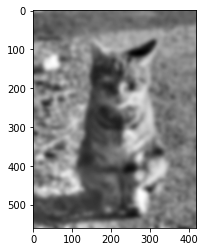

In [4]:
plt.imshow(edges, 'gray')

In [5]:
edges[5:10,5:10]

array([[ 2.69416531e-02,  3.23236244e-02,  3.73713210e-02,
         4.19400680e-02,  4.59181434e-02],
       [-9.68293031e-05,  4.38009422e-03,  8.54451702e-03,
         1.22583869e-02,  1.54216562e-02],
       [-2.62793042e-02, -2.23468441e-02, -1.86983650e-02,
        -1.54718451e-02, -1.27636628e-02],
       [-5.06797083e-02, -4.69793074e-02, -4.35248724e-02,
        -4.04590335e-02, -3.78812028e-02],
       [-7.25408878e-02, -6.88396000e-02, -6.53331518e-02,
        -6.21711374e-02, -5.94607611e-02]])

We have *positive* and *negative* numbers, implying that positive and negative edges are shown differently. If we want to show *all distinct edges* with a bright color, we have to do that by hand:

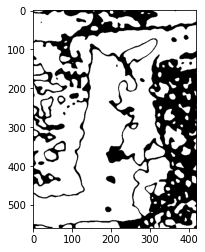

In [10]:
all_edges = np.abs(edges)
distinction_threshold = 0.05
plt.imshow(all_edges>distinction_threshold, 'gray')

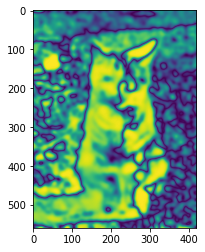

In [7]:
eq = exposure.exposure.equalize_hist(np.abs(all_edges))
plt.imshow(eq)

<img src="data/images/Backward.png" align='left'> [ImgProc_2_Filtering](ImgProc_2_Filtering.ipynb)


    Author: Thomas Haslwanter
    Date: Feb 02, 2023

<img src="data/images/CCA_40.png">
*Image Processing*  is licensed under a Creative Commons Attribution 4.0 International License.